In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *

In [2]:
def contributions(df_exp,var):
    dias = 91
    mat = np.ones((dias,dias))
    count = 0
    for i in np.arange(0,dias*dias,dias):
        mat[count,:] = df_exp[var][i:i+dias]
        count += 1
    mat_mean = np.mean(mat,axis=0)
    return(mat_mean-np.mean(mat_mean))

In [3]:
def contri_total(path,area,tipo,varis):
    if tipo == 'org':
        repla = 'o_in_r'
    elif tipo == 'rev':
        repla = 'r_in_o'
    df_tot = pd.read_csv(path+'RRTMG_Real_'+tipo+'_'+area+'.csv')
    df_exp = pd.read_csv(path+area+'_'+repla+'_all.csv')
    data = {}
    for var in varis:
        data[var] = contributions(df_exp,var)
    return(df_tot,data)

In [4]:
def one_plot(df_tot, data, area, ylabel, xlabel, sta, end, varis):
    ### Sta and End are to select the variable from dict, 0:4 OLR, 4:8 OLRclr, 8:12 SFC and 12:16 SFCclr
    colors = ['darkred','blue','darkorchid','lightsteelblue']
    labels = ['SST','Hum','Temp','Clouds']
    dias = 91
    
    plt.figure(figsize=(12,4))
    plt.plot(df_tot[ylabel][0:dias]-df_tot[ylabel][0:dias].mean(), color = 'darkcyan', label = 'Total')

    for i,var in enumerate(varis[sta:end]):
        plt.plot(data[var], color = colors[i], label = labels[i], linestyle = '--')
    plt.legend(frameon=False, ncol=5)
    plt.ylabel(ylabel+' (W m$^{-2}$)')
    plt.title(area, fontweight='bold')
    plt.xticks(np.arange(0,dias,10))
    plt.grid(linestyle=':')
    plt.xlabel(xlabel)

In [5]:
path = '/Users/acasalla/Documents/PhD/Thesis/Real/Data_RRTMG/'
varis = ['SST_OLR','Hum_OLR','Temp_OLR','Clouds_OLR',
         'SST_OLRclr','Hum_OLRclr','Temp_OLRclr','Clouds_OLRclr',
         'SST_SFC','Hum_SFC','Temp_SFC','Clouds_SFC',
         'SST_SFCclr','Hum_SFCclr','Temp_SFCclr','Clouds_SFCclr']

In [6]:
### 2N - 9N
d2_tot_org, d_2_9_org = contri_total(path,'2-9','org',varis)
d2_tot_rev, d_2_9_rev = contri_total(path,'2-9','rev',varis)

### 3N - 10N
d3_tot_org, d_3_10_org = contri_total(path,'3-10','org',varis)
d3_tot_rev, d_3_10_rev = contri_total(path,'3-10','rev',varis)

### 3S - 4N
d3s_tot_org, d_3s_4n_org = contri_total(path,'3S-4N','org',varis)
d3s_tot_rev, d_3s_4n_rev = contri_total(path,'3S-4N','rev',varis)


# Plotting one variable at a time!

In [7]:
fluxes = ['OLR','OLRclr','SFC','SFCclr']
sta = [0,4,8,12]
end = [4,8,12,16]

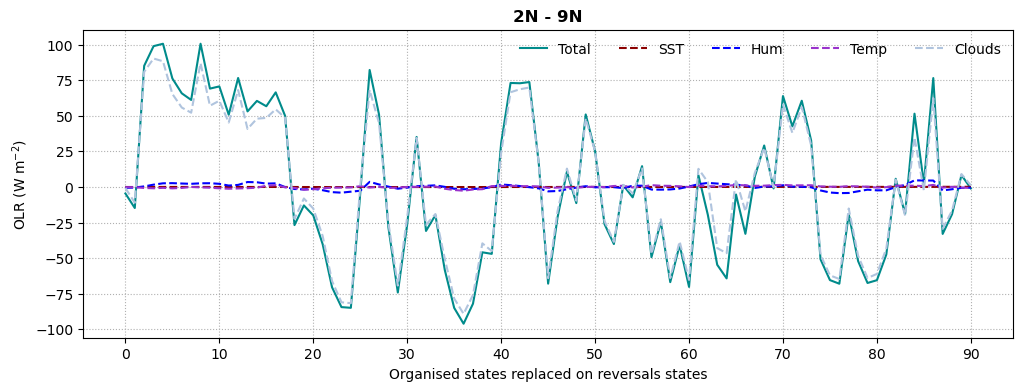

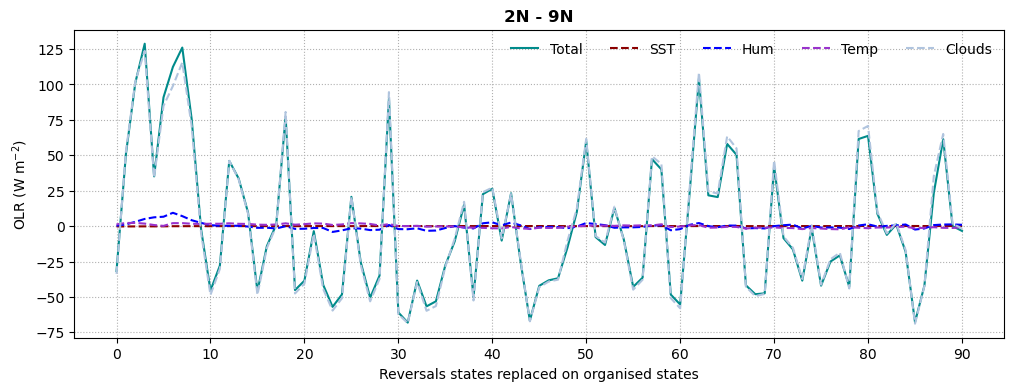

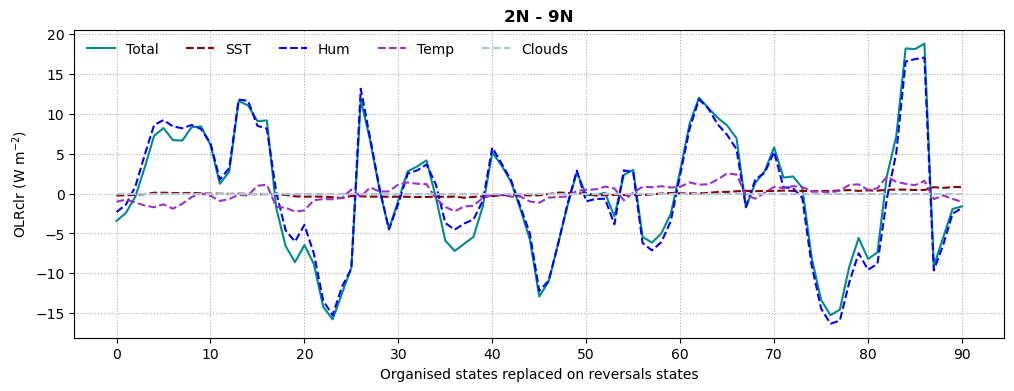

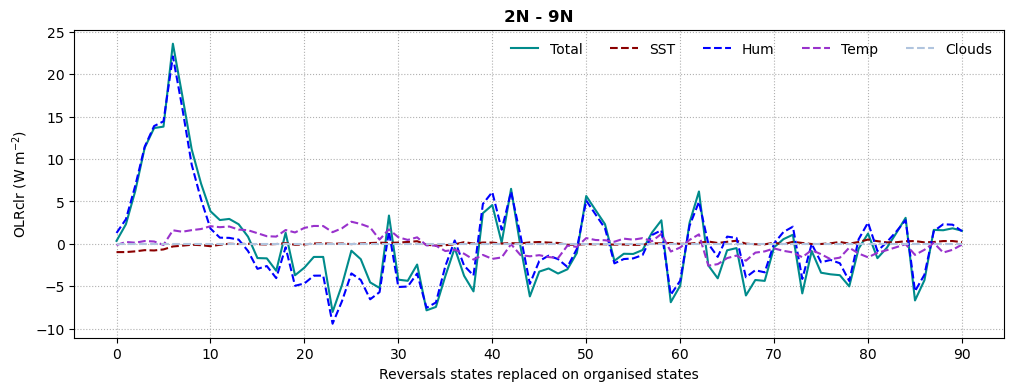

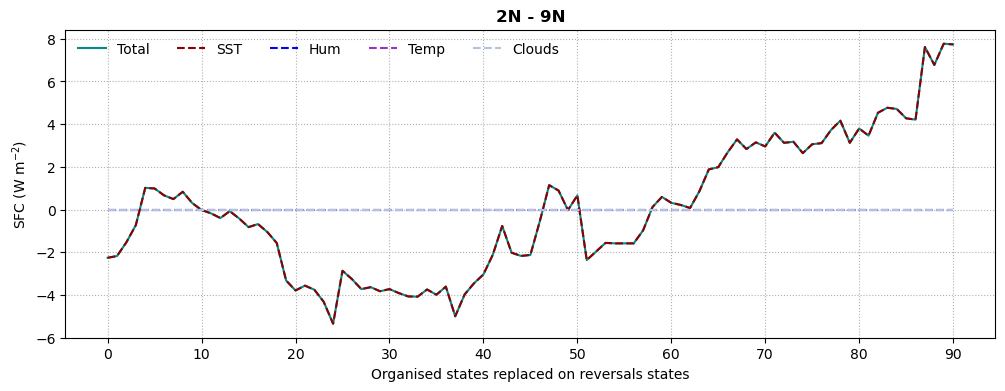

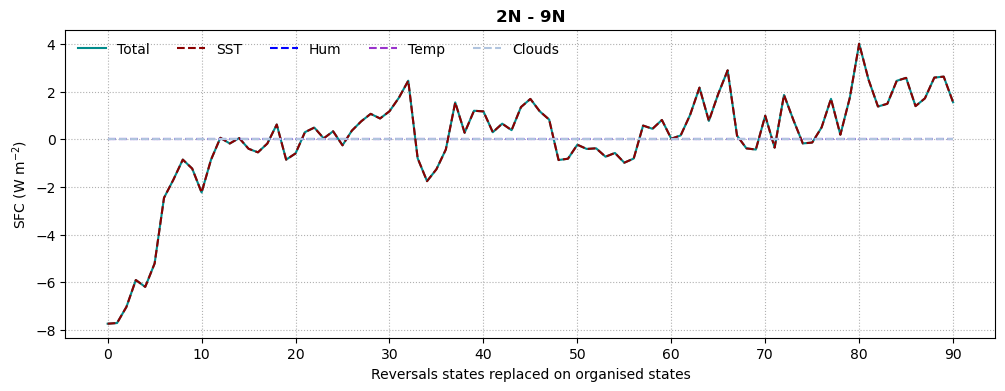

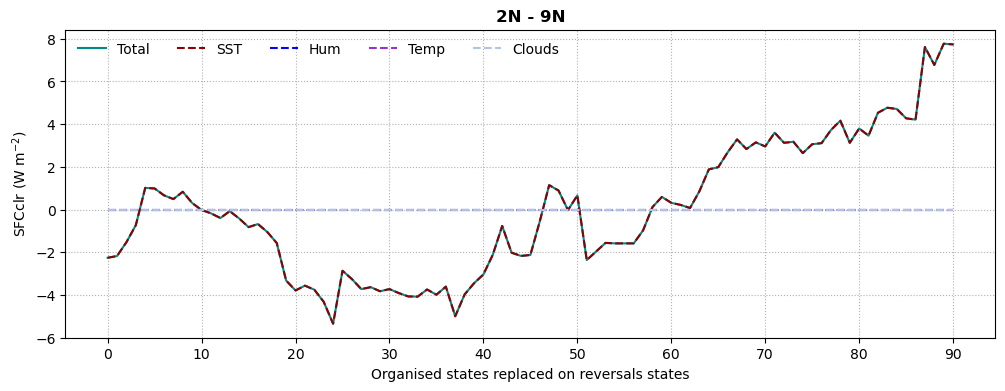

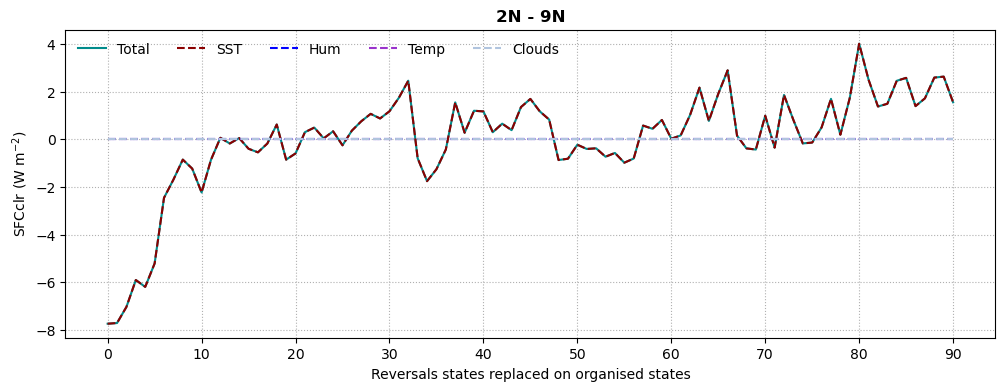

In [8]:
for i,flux in enumerate(fluxes):
    one_plot(d2_tot_org, d_2_9_org,'2N - 9N',flux,'Organised states replaced on reversals states',
             sta[i],end[i],varis)
    one_plot(d2_tot_rev, d_2_9_rev,'2N - 9N',flux,'Reversals states replaced on organised states',
             sta[i],end[i],varis)

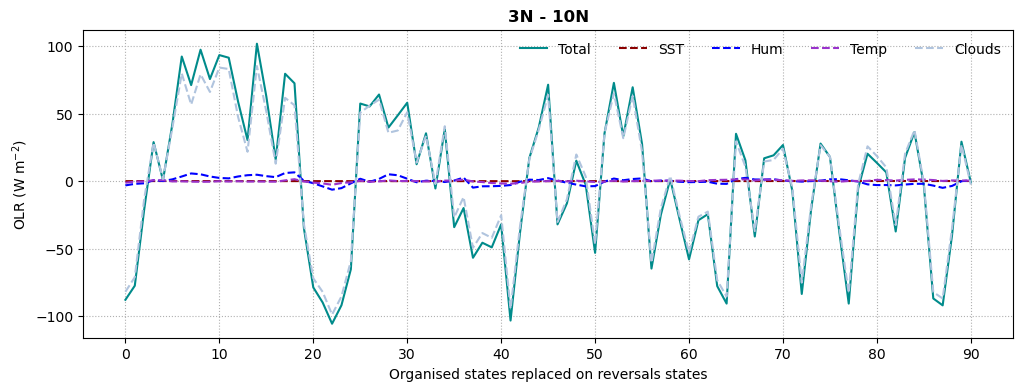

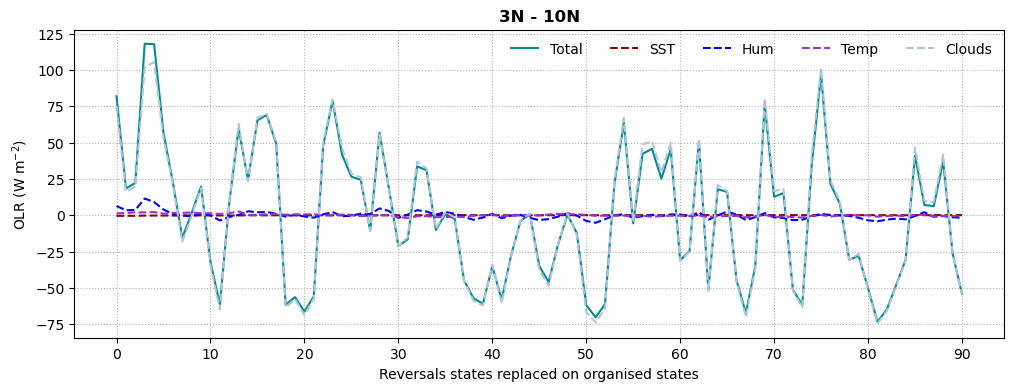

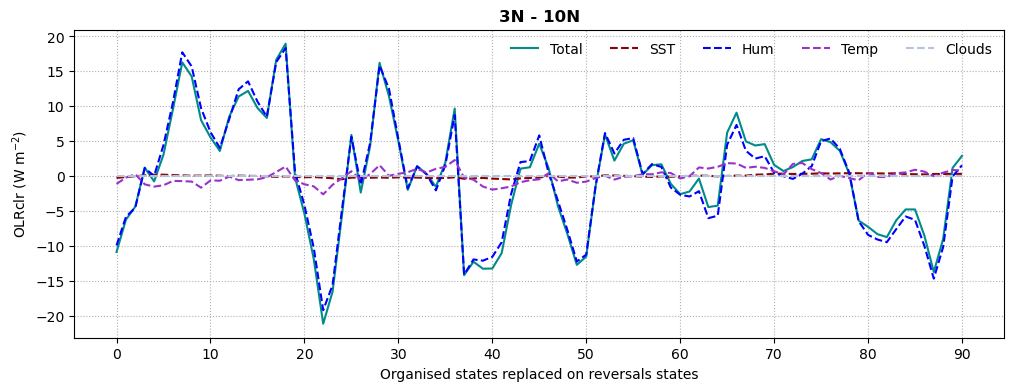

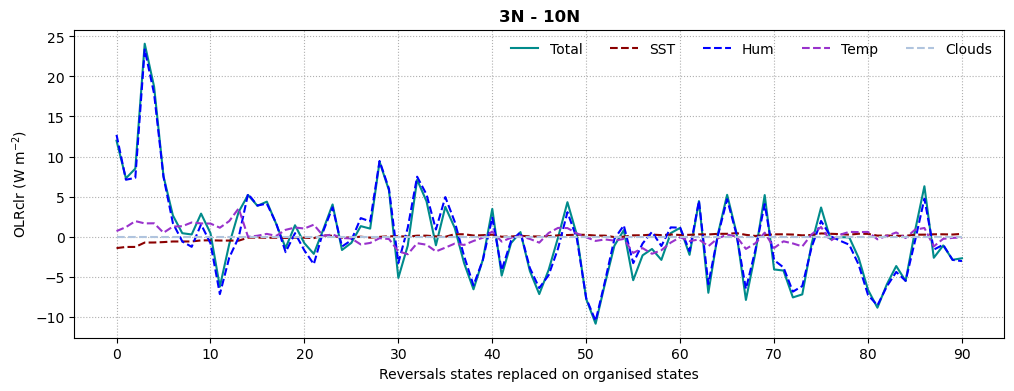

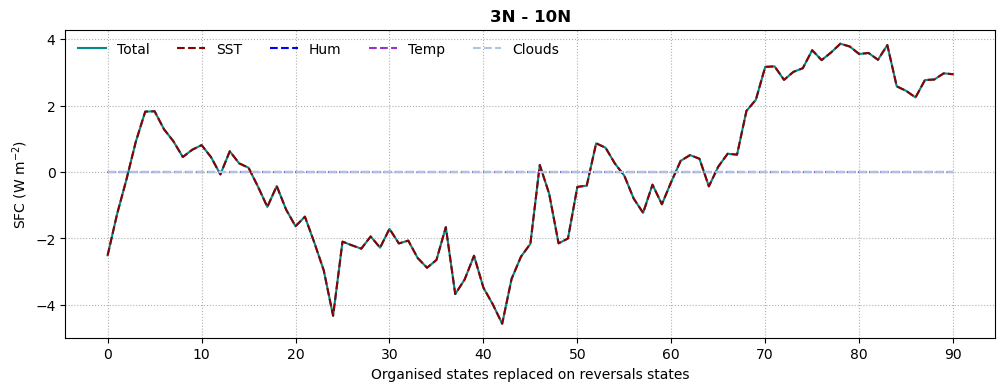

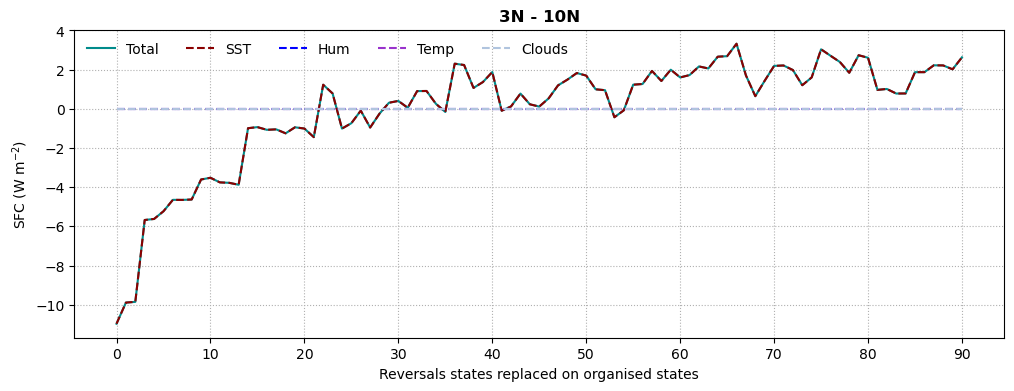

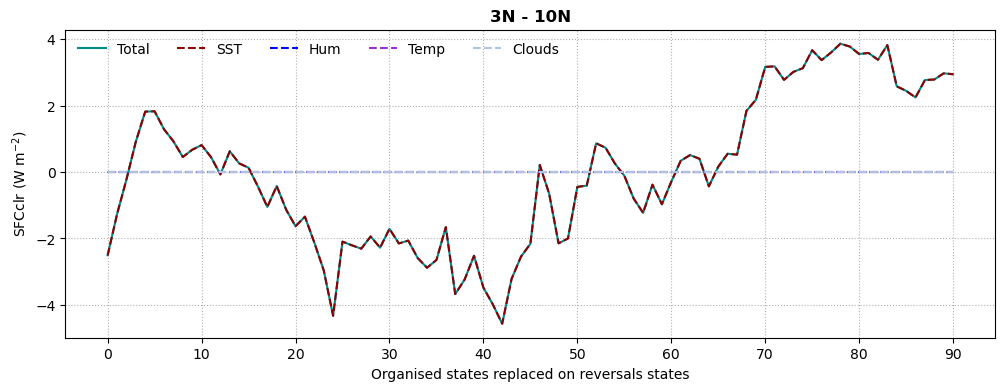

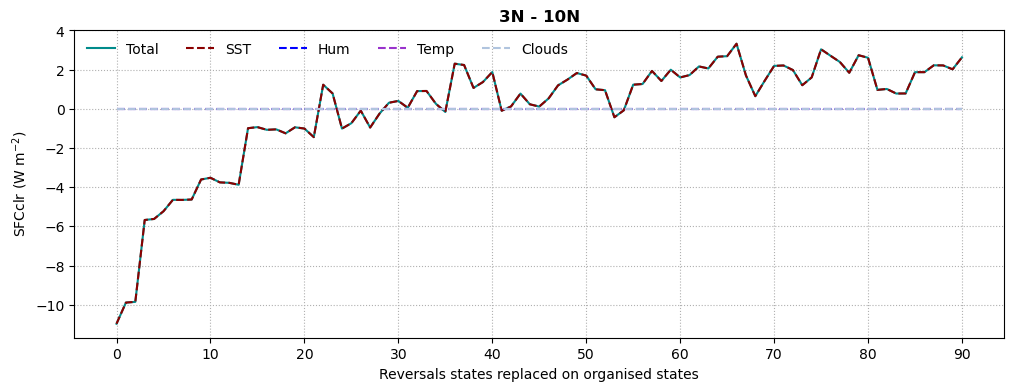

In [9]:
for i,flux in enumerate(fluxes):
    one_plot(d3_tot_org, d_3_10_org,'3N - 10N',flux,'Organised states replaced on reversals states',
             sta[i],end[i],varis)
    one_plot(d3_tot_rev, d_3_10_rev,'3N - 10N',flux,'Reversals states replaced on organised states',
             sta[i],end[i],varis)

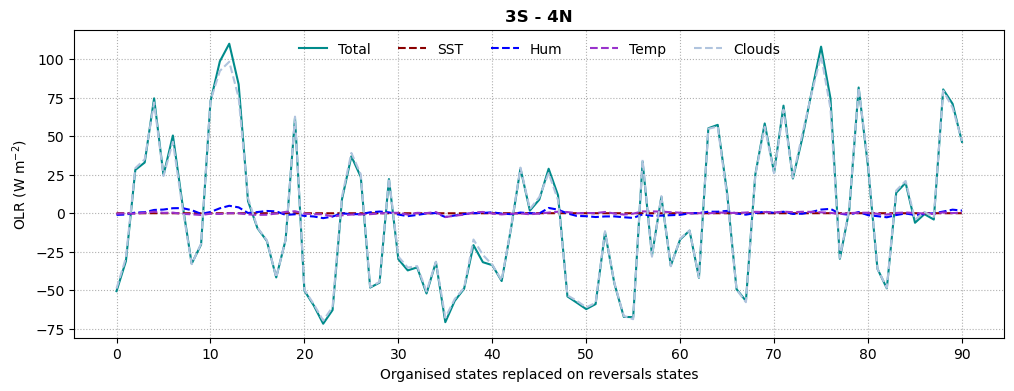

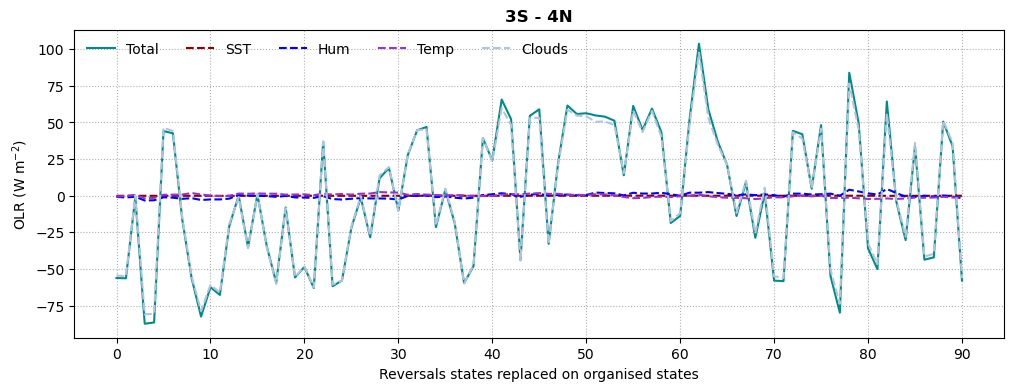

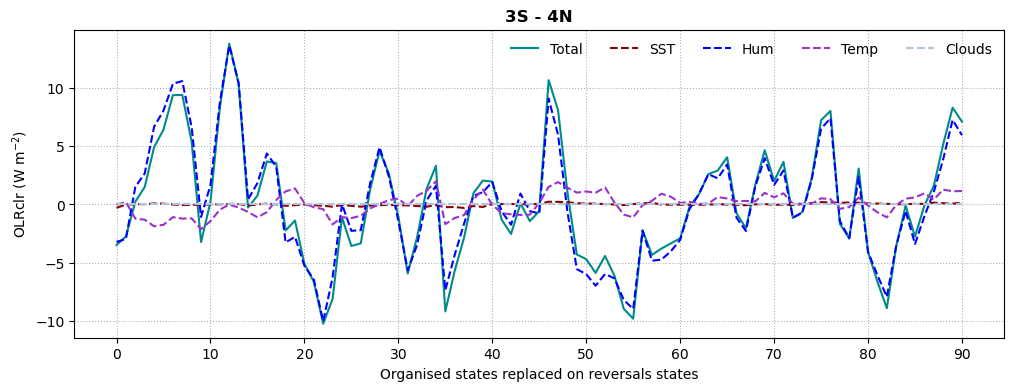

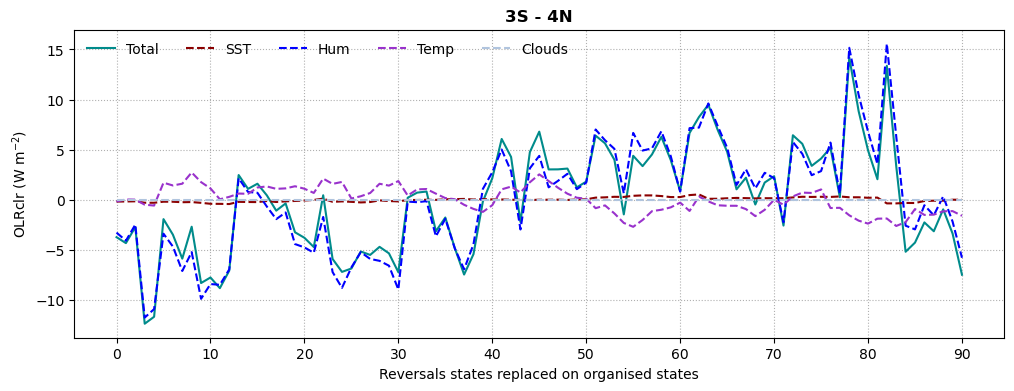

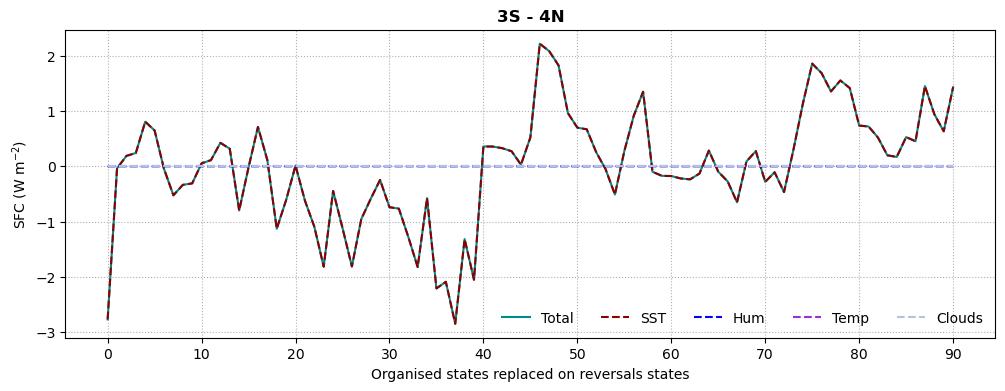

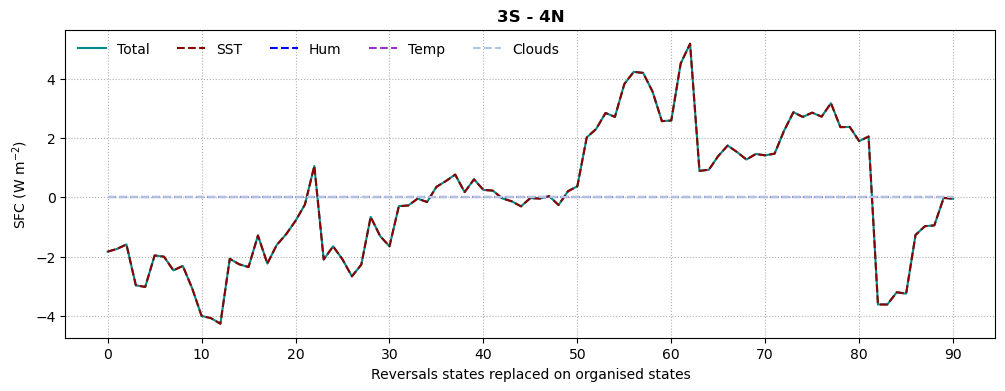

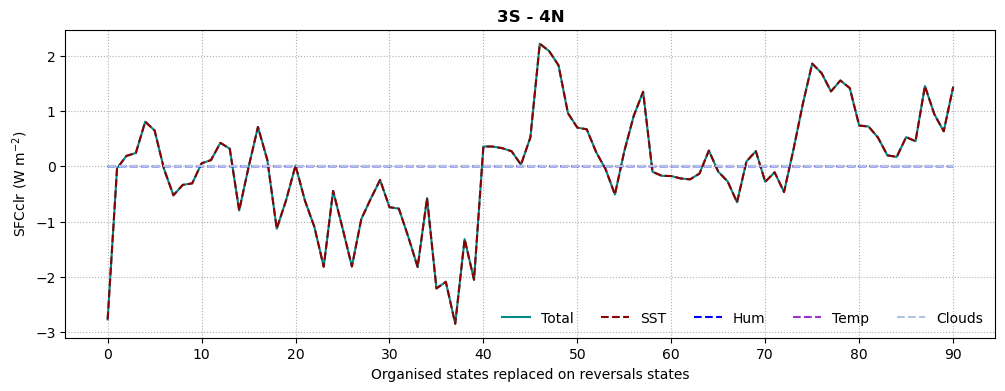

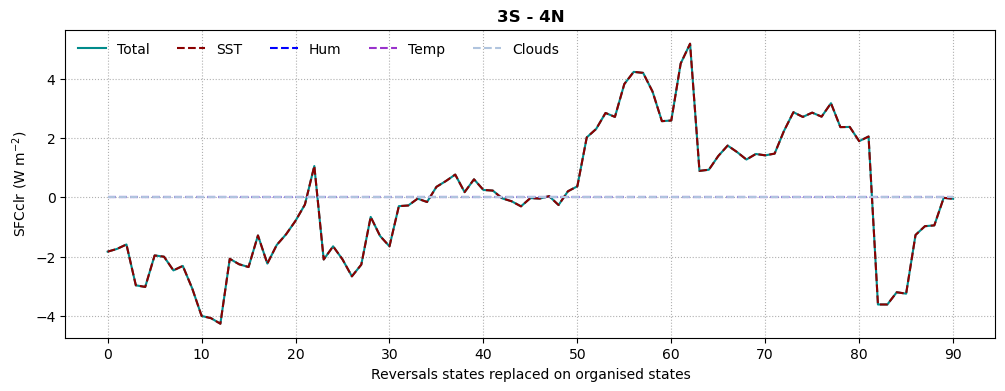

In [10]:
for i,flux in enumerate(fluxes):
    one_plot(d3s_tot_org, d_3s_4n_org,'3S - 4N',flux,'Organised states replaced on reversals states',
             sta[i],end[i],varis)
    one_plot(d3s_tot_rev, d_3s_4n_rev,'3S - 4N',flux,'Reversals states replaced on organised states',
             sta[i],end[i],varis)

# Plotting all areas together, join by variable and some calculations

In [11]:
def mult_plot(df_tot, data, area, ylabel, xlabel, sta, end, varis, index, total):
    ### Sta and End are to select the variable from dict, 0:4 OLR, 4:8 OLRclr, 8:12 SFC and 12:16 SFCclr
    colors = ['darkred','blue','darkorchid','darkcyan']
    labels = ['SST','Hum','Temp','Clouds']
    dias = 91
    
    plt.plot(df_tot[ylabel][0:dias]-df_tot[ylabel][0:dias].mean(), color = 'k', label = 'Total', alpha = 0.75)
    for i,var in enumerate(varis[sta:end]):
        plt.plot(data[var], color = colors[i], label = labels[i], alpha = 0.75)
    if total == 'One_legend':
        if index == 1:
            plt.legend(frameon=False, ncol=5, loc = 'upper center', bbox_to_anchor = (1.12,1.2), fontsize = 12)
    elif total == 'One_legend2':
        if index == 0:
            plt.legend(frameon=False, ncol=5, loc = 'upper center', bbox_to_anchor = (1.12,1.23), fontsize = 12)
    elif total == 'No_legend':
        plt.legend('', frameon=False)
    elif total == 'Mult_legend':
        plt.legend(frameon=False, ncol=5, loc = 'upper center', bbox_to_anchor = (0.54,1.12), fontsize = 12)
    #plt.ylabel(ylabel+' (W m$^{-2}$)')
    plt.title(area,loc='left')
    plt.ylabel('W m$^{-2}$', fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xticks(np.arange(0,dias,10), fontsize = 12)
    if index > 3:
        plt.xlabel(xlabel, fontsize = 12)
    else:
        plt.xlabel(xlabel, fontsize = 12)
    plt.grid(linestyle=':', linewidth=0.5)
    

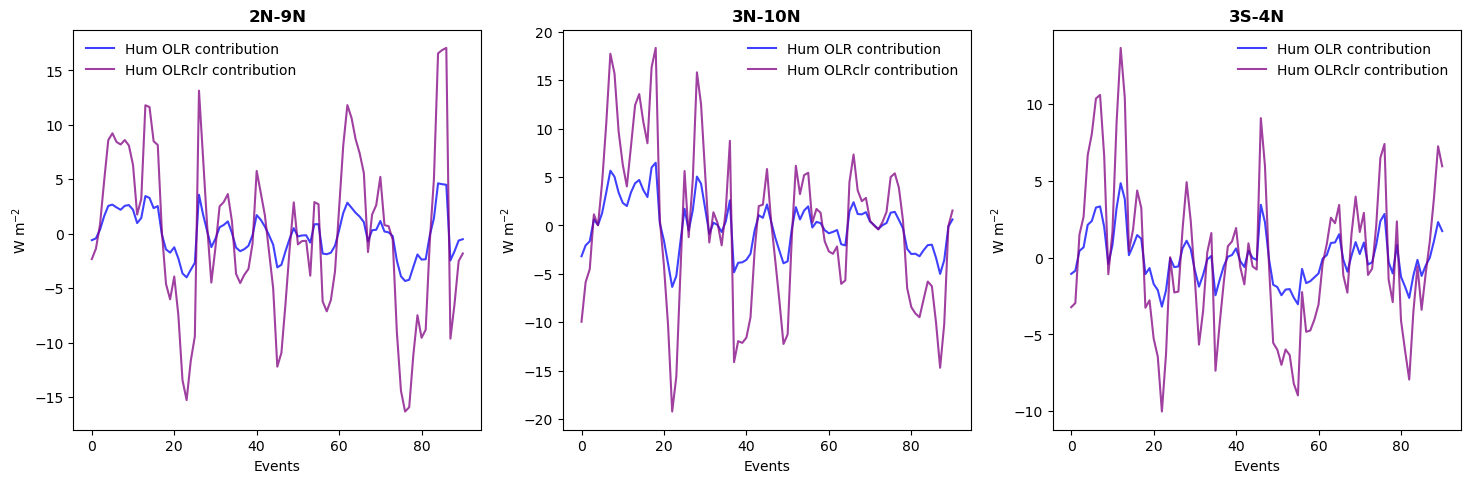

In [12]:
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,3, left=0.05, right=0.975, hspace=0.2, wspace=0.2, top=0.9, bottom=0.1)
ax=subplot(gs[0])
percen = d_2_9_org['Hum_OLR']*100/d_2_9_org['Hum_OLRclr']
plt.plot(d_2_9_org['Hum_OLR'], color = 'blue', alpha = 0.75, label = 'Hum OLR contribution')
plt.plot(d_2_9_org['Hum_OLRclr'], color = 'purple', alpha = 0.75, label = 'Hum OLRclr contribution')
plt.legend(frameon=False)
plt.ylabel('W m$^{-2}$')
plt.xlabel('Events')
plt.title('2N-9N', fontweight='bold')

ax=subplot(gs[1])
percen = d_3_10_org['Hum_OLR']*100/d_3_10_org['Hum_OLRclr']
plt.plot(d_3_10_org['Hum_OLR'], color = 'blue', alpha = 0.75, label = 'Hum OLR contribution')
plt.plot(d_3_10_org['Hum_OLRclr'], color = 'purple', alpha = 0.75, label = 'Hum OLRclr contribution')
plt.legend(frameon=False)
plt.ylabel('W m$^{-2}$')
plt.xlabel('Events')
plt.title('3N-10N', fontweight='bold')

ax=subplot(gs[2])
percen = d_3s_4n_org['Hum_OLR']*100/d_3s_4n_org['Hum_OLRclr']
plt.plot(d_3s_4n_org['Hum_OLR'], color = 'blue', alpha = 0.75, label = 'Hum OLR contribution')
plt.plot(d_3s_4n_org['Hum_OLRclr'], color = 'purple', alpha = 0.75, label = 'Hum OLRclr contribution')
plt.legend(frameon=False)
plt.ylabel('W m$^{-2}$')
plt.xlabel('Events')
plt.title('3S-4N', fontweight='bold')
plt.show()

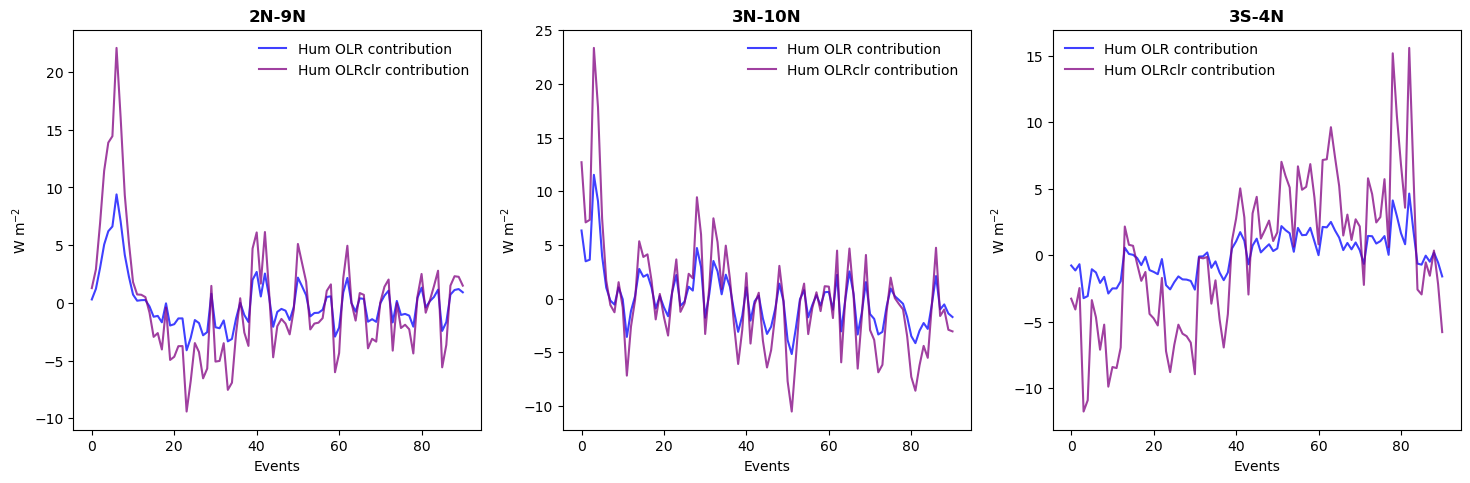

In [13]:
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,3, left=0.05, right=0.975, hspace=0.2, wspace=0.2, top=0.9, bottom=0.1)
ax=subplot(gs[0])
percen = d_2_9_rev['Hum_OLR']*100/d_2_9_rev['Hum_OLRclr']
plt.plot(d_2_9_rev['Hum_OLR'], color = 'blue', alpha = 0.75, label = 'Hum OLR contribution')
plt.plot(d_2_9_rev['Hum_OLRclr'], color = 'purple', alpha = 0.75, label = 'Hum OLRclr contribution')
plt.legend(frameon=False)
plt.ylabel('W m$^{-2}$')
plt.xlabel('Events')
plt.title('2N-9N', fontweight='bold')

ax=subplot(gs[1])
percen = d_3_10_rev['Hum_OLR']*100/d_3_10_rev['Hum_OLRclr']
plt.plot(d_3_10_rev['Hum_OLR'], color = 'blue', alpha = 0.75, label = 'Hum OLR contribution')
plt.plot(d_3_10_rev['Hum_OLRclr'], color = 'purple', alpha = 0.75, label = 'Hum OLRclr contribution')
plt.legend(frameon=False)
plt.ylabel('W m$^{-2}$')
plt.xlabel('Events')
plt.title('3N-10N', fontweight='bold')

ax=subplot(gs[2])
percen = d_3s_4n_rev['Hum_OLR']*100/d_3s_4n_rev['Hum_OLRclr']
plt.plot(d_3s_4n_rev['Hum_OLR'], color = 'blue', alpha = 0.75, label = 'Hum OLR contribution')
plt.plot(d_3s_4n_rev['Hum_OLRclr'], color = 'purple', alpha = 0.75, label = 'Hum OLRclr contribution')
plt.legend(frameon=False)
plt.ylabel('W m$^{-2}$')
plt.xlabel('Events')
plt.title('3S-4N', fontweight='bold')
plt.show()

In [14]:
tots = [d2_tot_org, d2_tot_rev, 
        d3_tot_org, d3_tot_rev,
        d3s_tot_org, d3s_tot_rev]
exps = [d_2_9_org, d_2_9_rev, 
        d_3_10_org, d_3_10_rev, 
        d_3s_4n_org, d_3s_4n_rev]
area = ['(a) 2N-9N and 135E-145E','(b) 2N-9N and 135E-145E',
        '(c) 3N-10N and 147E-157E','(d) 3N-10N and 147E-157E',
        '(g) 3S-4N and 156E-166E','(f) 3S-4N and 156E-166E']
xlabel = ['Clustered states replaced with reversals states', 'Reversals states replaced with clustered states',
          'Clustered states replaced with reversals states', 'Reversals states replaced with clustered states',
          'Clustered states replaced with reversals states', 'Reversals states replaced with clustered states']

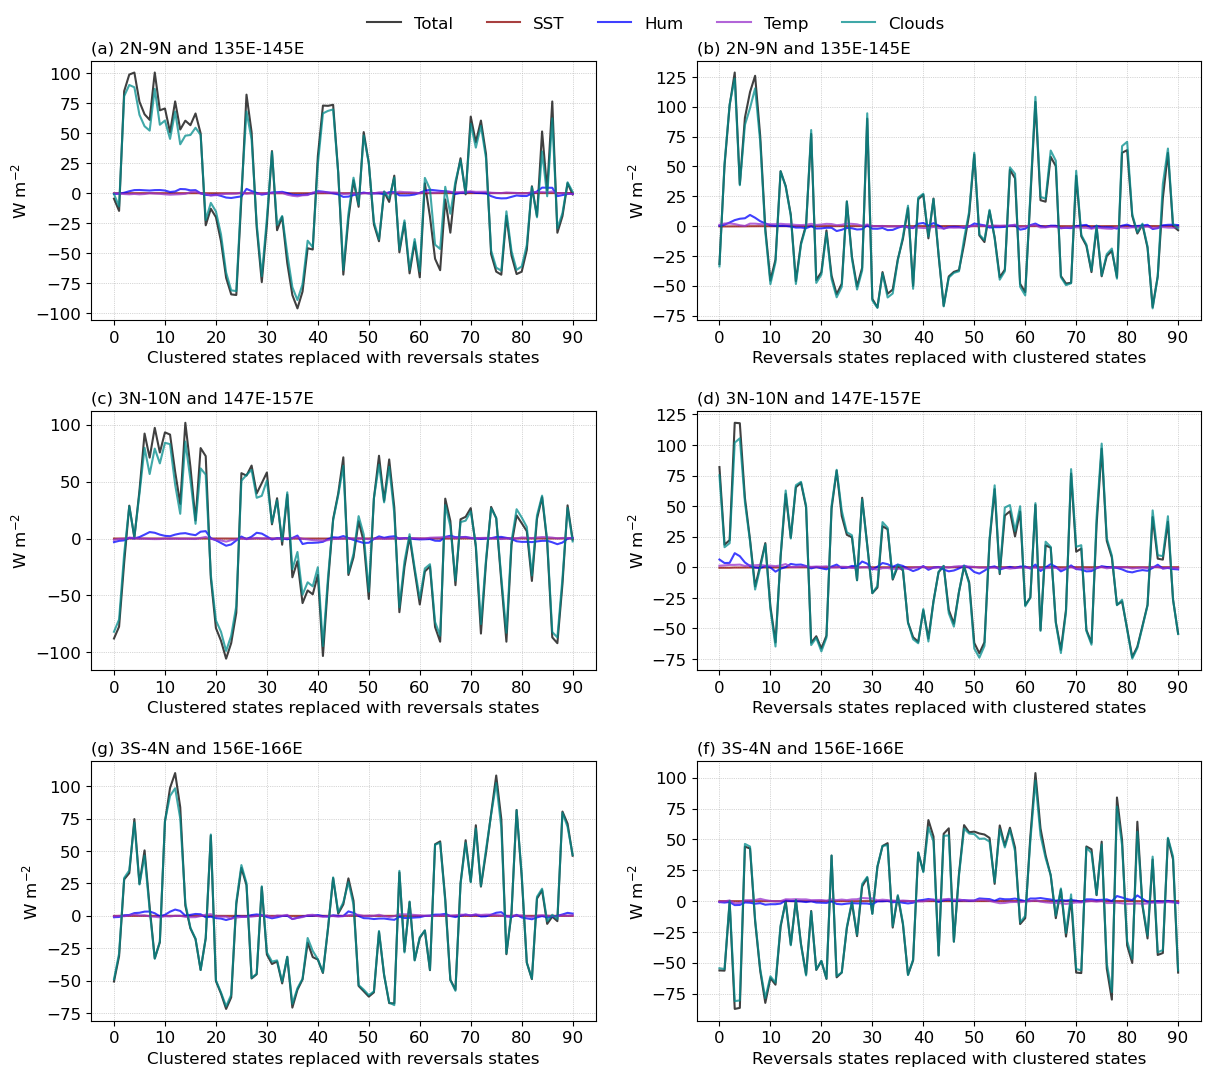

In [15]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,2, left=0.05, right=0.975, hspace=0.35, wspace=0.2, top=0.9, bottom=0.1)

for i,tot in enumerate(tots):
    ax=subplot(gs[i])
    mult_plot(tot,exps[i],area[i],'OLR',xlabel[i],0,4,varis, i, 'One_legend2')
    
plt.savefig(path+'Fig_contributions_Mlawer_OLR.jpg', bbox_inches='tight', dpi=300)
plt.savefig(path+'Fig_contributions_Mlawer_OLR.pdf', bbox_inches='tight', dpi=300)

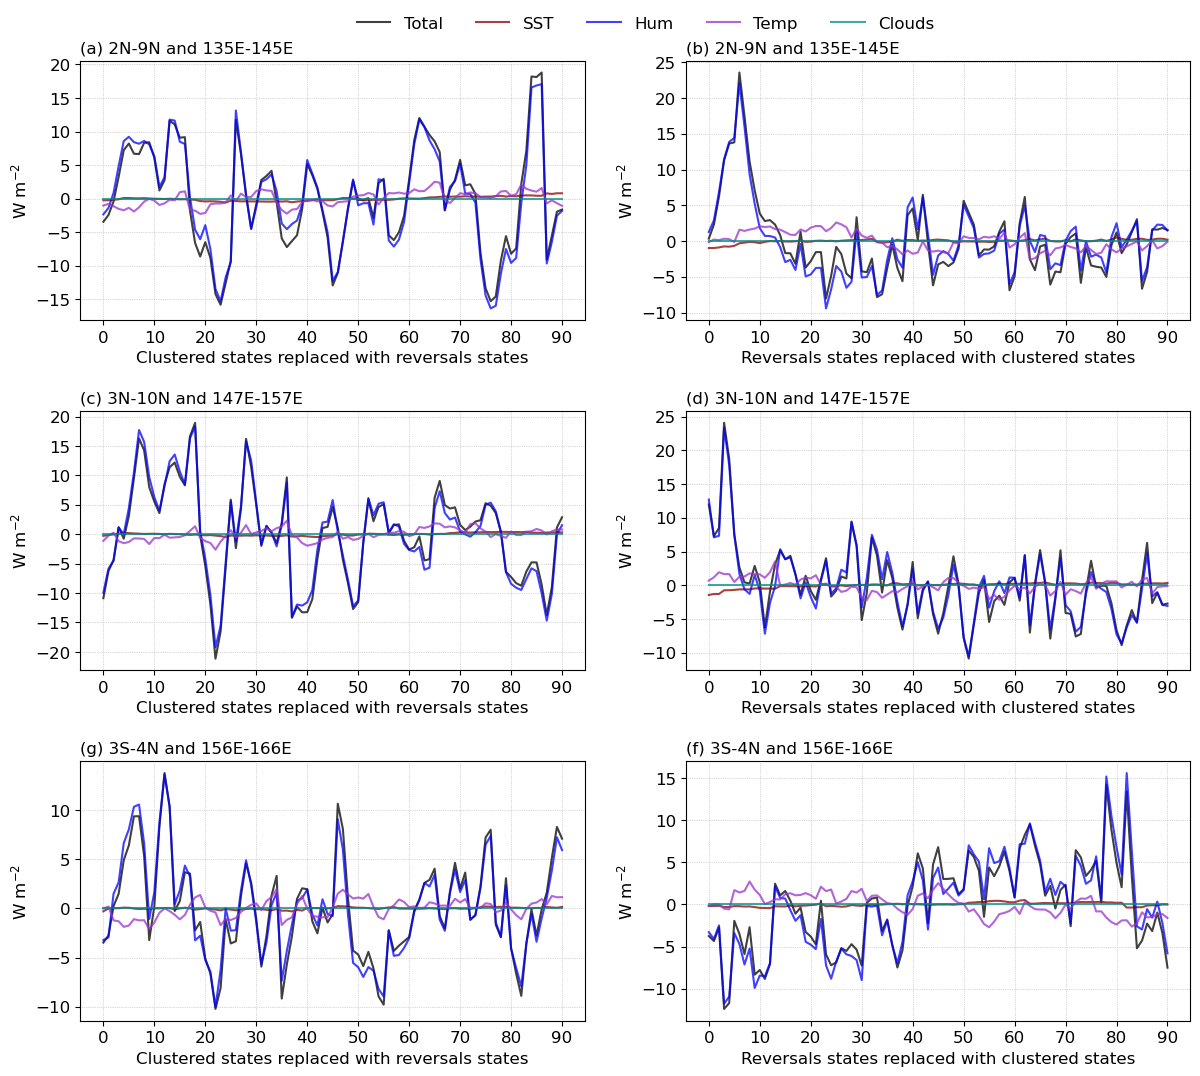

In [16]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,2, left=0.05, right=0.975, hspace=0.35, wspace=0.2, top=0.9, bottom=0.1)

for i,tot in enumerate(tots):
    ax=subplot(gs[i])
    mult_plot(tot,exps[i],area[i],'OLRclr',xlabel[i],4,8,varis, i, 'One_legend2')
    
plt.savefig(path+'Fig_contributions_Mlawer_OLRC.jpg', bbox_inches='tight', dpi=300)
plt.savefig(path+'Fig_contributions_Mlawer_OLRC.pdf', bbox_inches='tight', dpi=300)

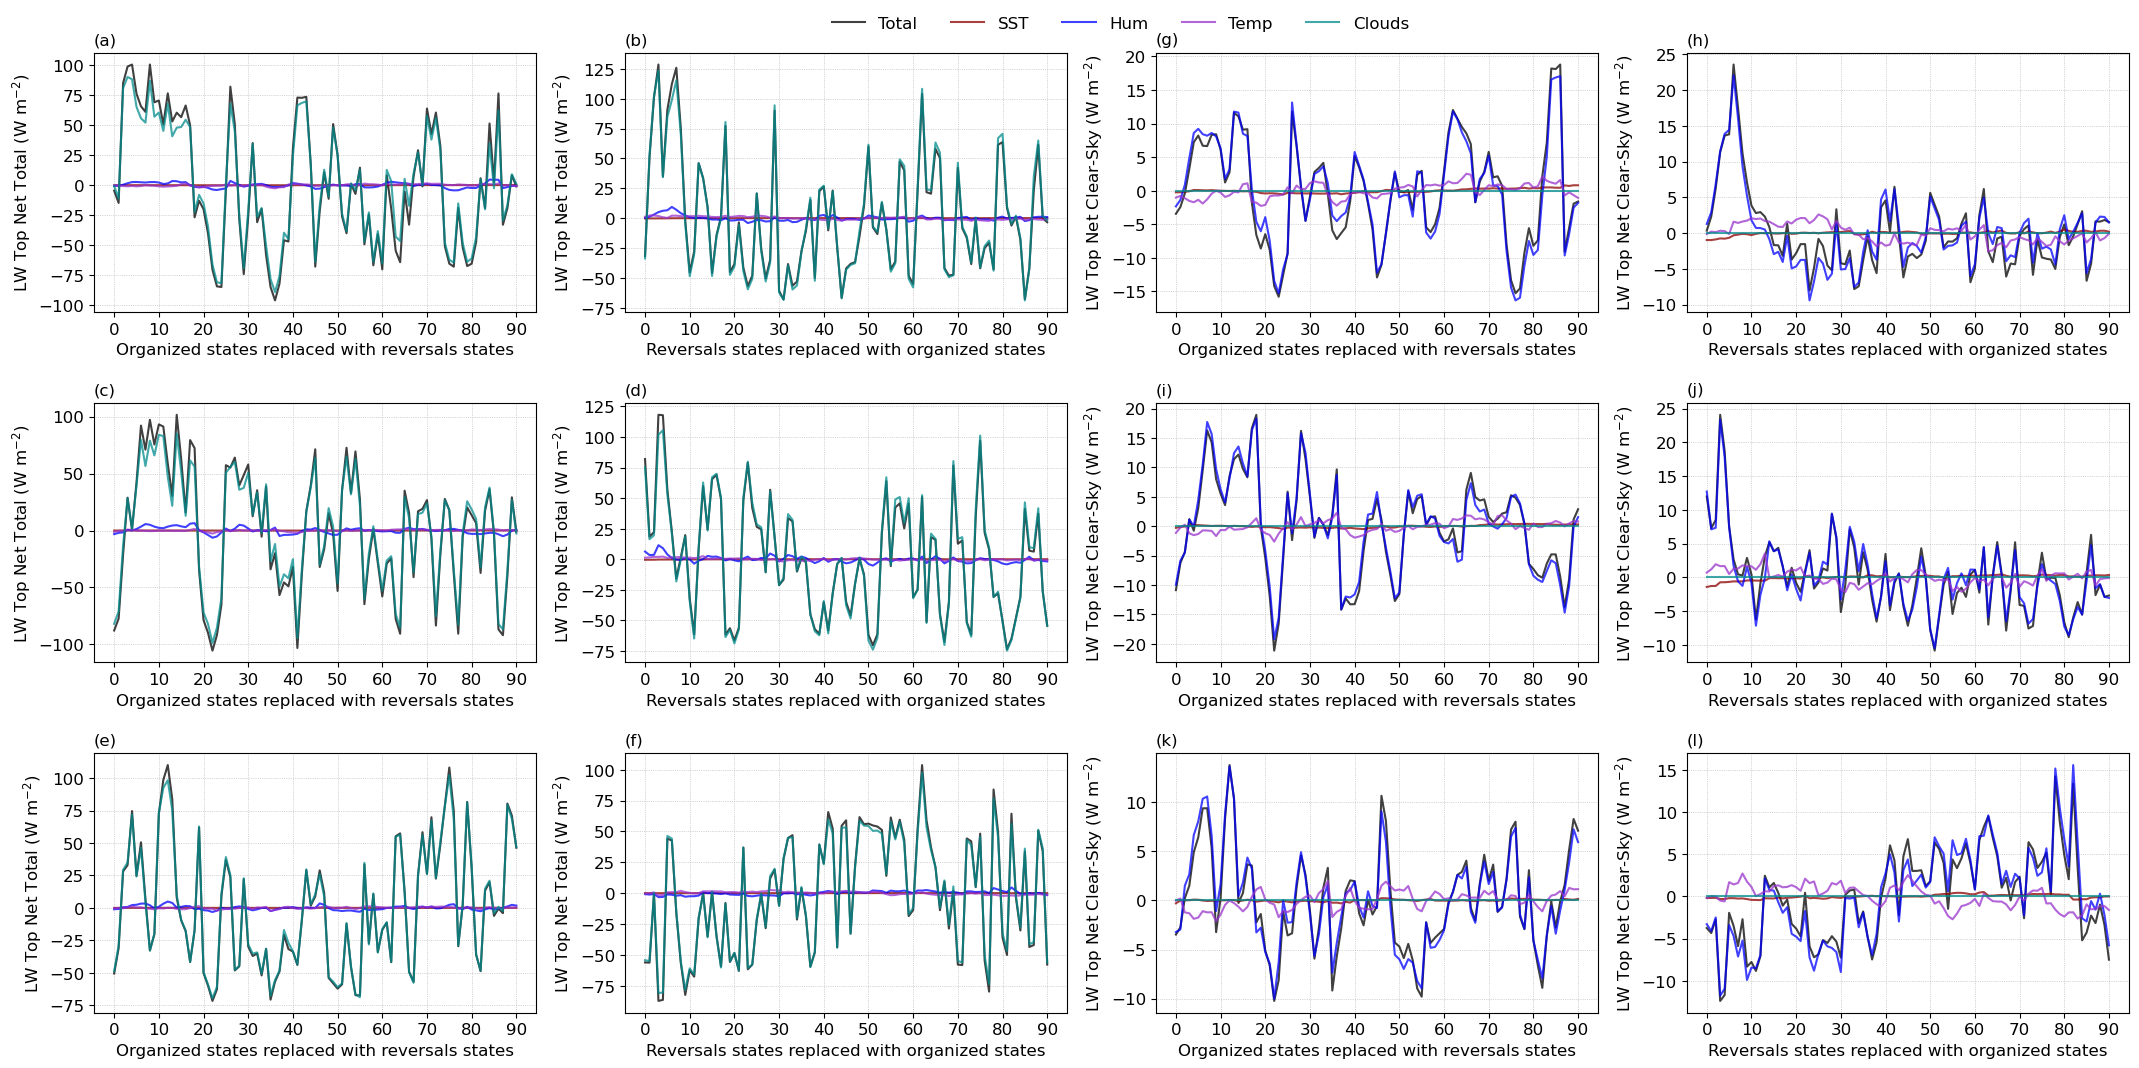

In [17]:
fig = plt.figure(figsize=(22,12))
gs = gridspec.GridSpec(3,4, left=0.05, right=0.975, hspace=0.35, wspace=0.2, top=0.9, bottom=0.1)
area1 = ['(a)','(b)','(c)','(d)','(e)','(f)']
area2 = ['(g)','(h)','(i)','(j)','(k)','(l)']
num1 = [0,1,4,5,8,9]
num2 = [2,3,6,7,10,11]
path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/'

for i,tot in enumerate(tots):
    ax=subplot(gs[num1[i]])
    mult_plot(tot,exps[i],area1[i],'OLR',xlabel[i],0,4,varis, i, 'One_legend')
    plt.ylabel('LW Top Net Total (W m$^{-2}$)')

for i,tot in enumerate(tots):
    ax=subplot(gs[num2[i]])
    mult_plot(tot,exps[i],area2[i],'OLRclr',xlabel[i],4,8,varis, i, 'No_legend')
    plt.ylabel('LW Top Net Clear-Sky (W m$^{-2}$)')

plt.savefig(path+'Fig_contributions_2.jpg', bbox_inches='tight', dpi=300)
plt.savefig(path+'Fig_contributions_2.pdf', bbox_inches='tight', dpi=300)

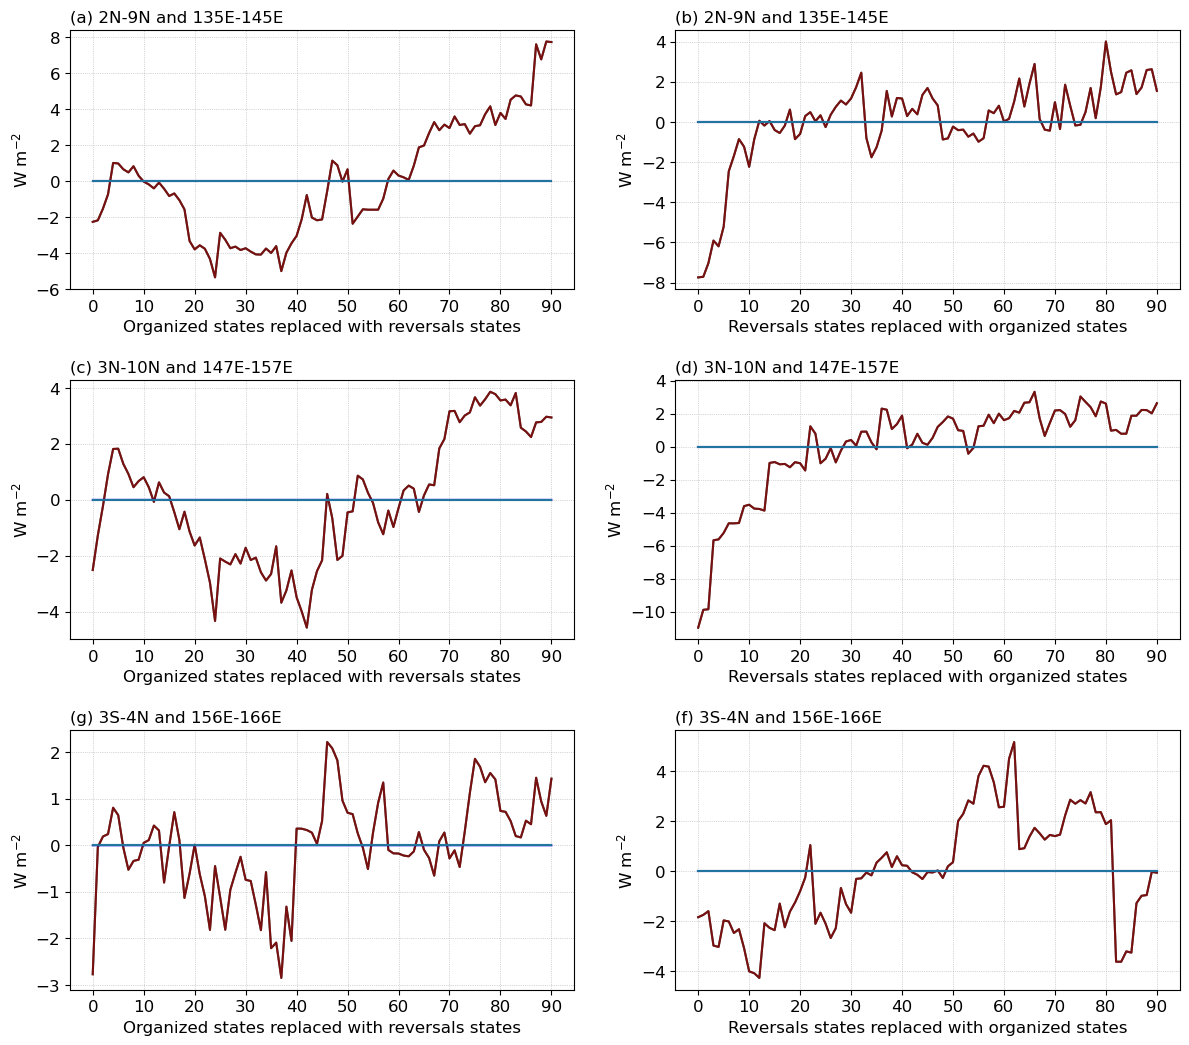

In [18]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,2, left=0.05, right=0.975, hspace=0.35, wspace=0.2, top=0.9, bottom=0.1)

for i,tot in enumerate(tots):
    ax=subplot(gs[i])
    mult_plot(tot,exps[i],area[i],'SFC',xlabel[i],8,12,varis, i, '')

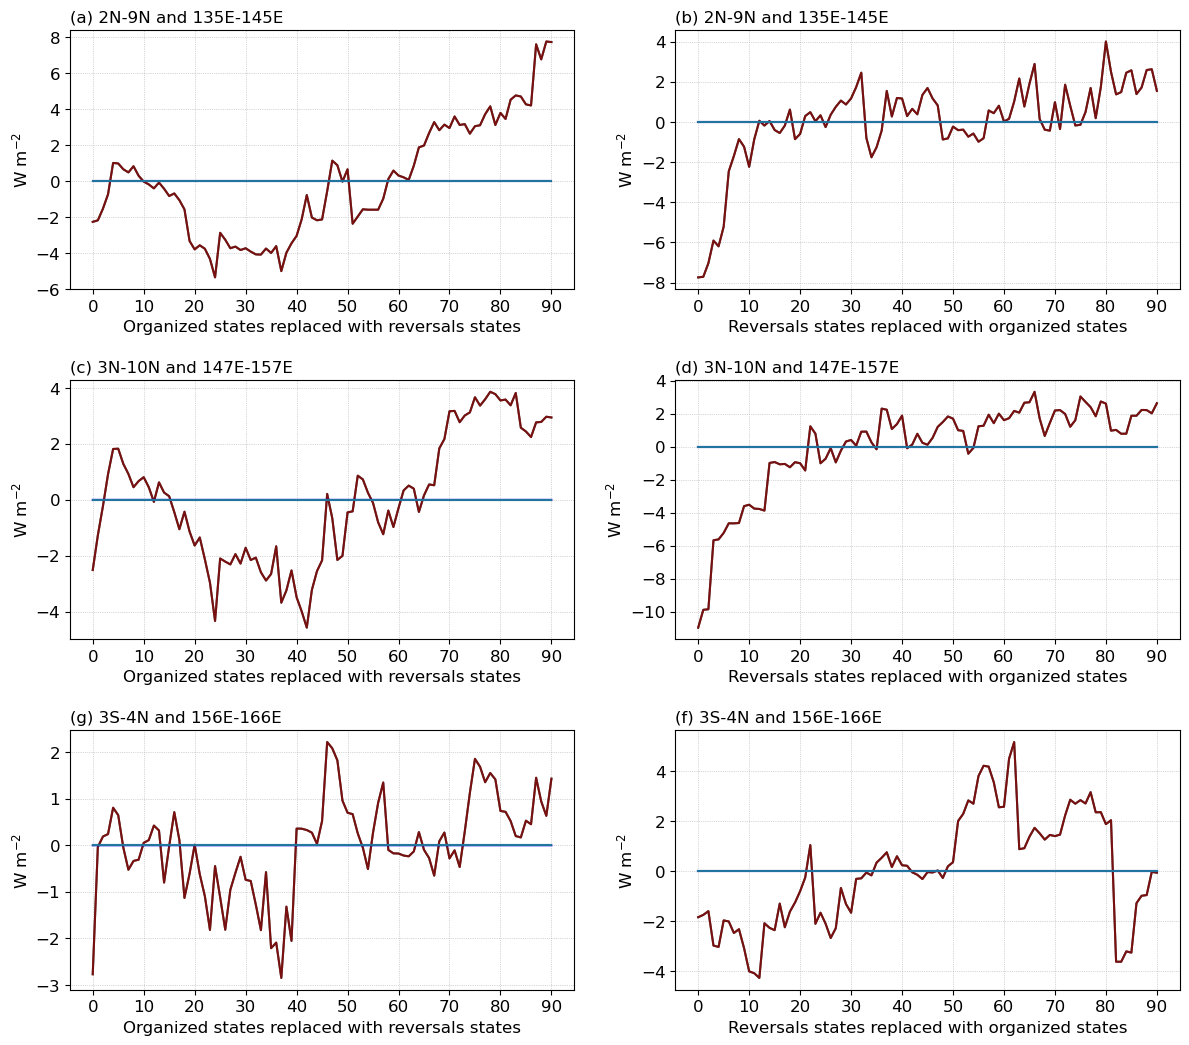

In [19]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,2, left=0.05, right=0.975, hspace=0.35, wspace=0.2, top=0.9, bottom=0.1)

for i,tot in enumerate(tots):
    ax=subplot(gs[i])
    mult_plot(tot,exps[i],area[i],'SFCclr',xlabel[i],12,16,varis, i,'')